# Examples for rank 4 array using TACO-like dimensions

Pass COO-like data to `SparseTensor` with one array of indices for each dimension.

The default is to create CSF sparse data structure where all but the last dimension are doubly compressed.

Use `.taco_view` attribute to see the TACO-like data structure.

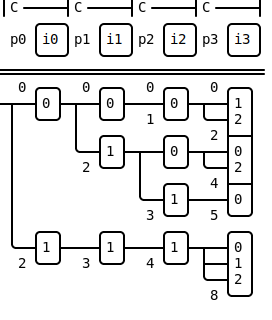

In [1]:
from sparsetensorviz import SparseTensor
import itertools
import IPython

indices = [
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 1, 1, 1, 1],
    [1, 2, 0, 2, 0, 0, 1, 2],
]
sp = SparseTensor(indices).taco_view
# Display as SVG diagram
sp

In [2]:
sp.indices

[array([0, 1]),
 array([0, 1, 1]),
 array([0, 0, 1, 1]),
 array([1, 2, 0, 2, 0, 0, 1, 2])]

In [3]:
sp.pointers

[array([0, 2]), array([0, 2, 3]), array([0, 1, 3, 4]), array([0, 2, 4, 5, 8])]

In [4]:
# Can also display as ASCII diagram
print(sp)

|C -----|C -----|C -----|C -----|
    .---.   .---.   .---.   .---.
 p0 |i0 |p1 |i1 |p2 |i2 |p3 |i3 |
    `---'   `---'   `---'   `---'
  0 .--.  0 .--.  0 .--.  0 .--.
-+--|0 |-+--|0 |----|0 |-+--|1 |
 |  `--' |  `--'  1 `--' `--|2 |
 |       |  .--.    .--.  2 |--|
 |       `--|1 |-+--|0 |-+--|0 |
 |        2 `--' |  `--' `--|2 |
 |               |  .--.  4 |--|
 |               `--|1 |----|0 |
 |                3 `--'  5 `--'
 |  .--.    .--.    .--.    .--.
 `--|1 |----|1 |----|1 |-+--|0 |
  2 `--'  3 `--'  4 `--' |--|1 |
                         `--|2 |
                          8 `--'


This diagram forms a tree-like structure where the first dimension is on the left and last dimension is on the right.

Index values are in boxes, and pointer values are next to edges.

We can choose how each dimension is compressed:
- **`S`, "sparse"**: like COO; indices are "aligned" to the following dimension indices or values.
  - Uses: `indices_i`
- **`C`, "compressed"**: like CSR; fast lookup by index into pointers to the next dimension.
  - Uses: `pointers_i`
  - Makes `pointers_{i-1}` unnecessary
- **`DC`, "doubly compressed"**: like DCSR; store unique index values and pointers to the next dimension.
  - Uses: `pointers_i`, `indices_i`

Currently, the final dimension must be sparse, **`S`**.

Hence, describing the structures of **CSR, CSC, DCSR, and DCSC** give us... CSR, CSC, DCSR, and DCSC (let's address the final "R" and "C" later).


#### TACO-like names
This notebook highlights the use of TACO-like names, which are:
- **"compressed"**: e.g., DCSR is `["compressed", "compressed"]`
- **"compressed-nonunique"**: e.g., COO is `["compressed-nonunique", "singleton"]`
- **"singleton"**: e.g., COO is `["compressed-nonunique", "singleton"]`
- **"dense"**: e.g., CSR is `["dense", "compressed"]`

In [5]:
sp.structure

['compressed', 'compressed', 'compressed', 'compressed']

In [6]:
sp.abbreviation

'C-C-C-C'

## Display all sparse structures

Hyphonated connecting lines indicate pointers that don't need stored.

Hyphonated boxes indicate indices that don't need stored.

In [7]:
def display_header(st, *, align=False, seen_taco=None):
    taco_structure = ", ".join(st.taco_structure)
    text = (
        "```\n"
        f"taco_structure = [{taco_structure}]\n\n"
        f"structure      = {st.structure}\n\n"
        "```"
    )
    IPython.display.display(IPython.display.Markdown(text))

# `C-C-C-C`

```
taco_structure = [compressed, compressed, compressed, compressed]

structure      = [doubly_compressed, doubly_compressed, doubly_compressed, sparse]

```

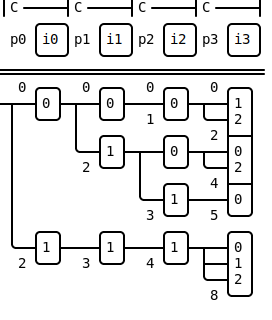

# `C-C-CN-S`

```
taco_structure = [compressed, compressed, compressed-nonunique, singleton]

structure      = [doubly_compressed, doubly_compressed, sparse, sparse]

```

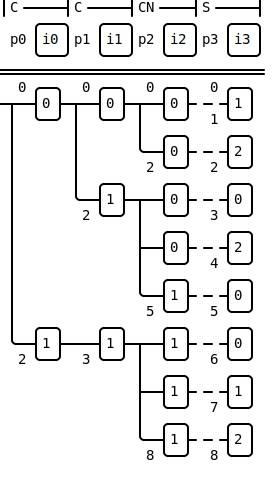

# `C-C-S-C`

```
taco_structure = [compressed, compressed, singleton, compressed]

structure      = [doubly_compressed, sparse, doubly_compressed, sparse]

```

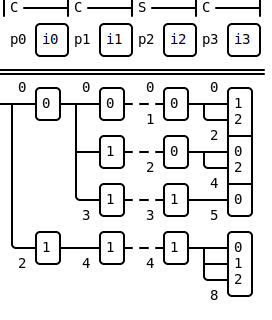

# `C-C-D-C`

```
taco_structure = [compressed, compressed, dense, compressed]

structure      = [doubly_compressed, doubly_compressed, compressed, sparse]

```

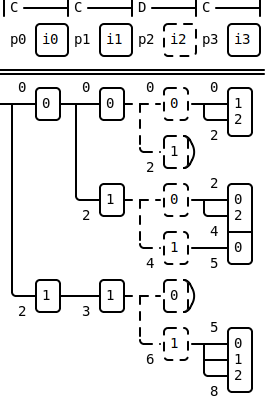

# `C-CN-S-S`

```
taco_structure = [compressed, compressed-nonunique, singleton, singleton]

structure      = [doubly_compressed, sparse, sparse, sparse]

```

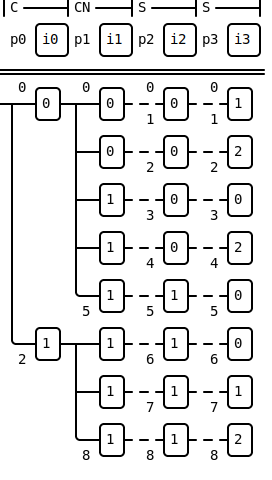

# `C-CN-D-C`

```
taco_structure = [compressed, compressed-nonunique, dense, compressed]

structure      = [doubly_compressed, sparse, compressed, sparse]

```

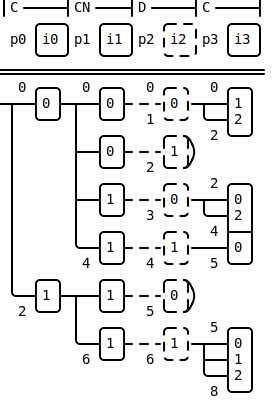

# `C-S-C-C`

```
taco_structure = [compressed, singleton, compressed, compressed]

structure      = [sparse, doubly_compressed, doubly_compressed, sparse]

```

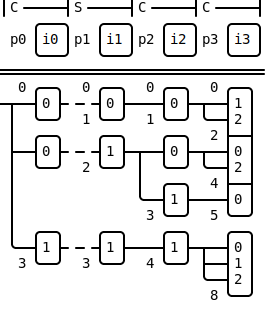

# `C-S-CN-S`

```
taco_structure = [compressed, singleton, compressed-nonunique, singleton]

structure      = [sparse, doubly_compressed, sparse, sparse]

```

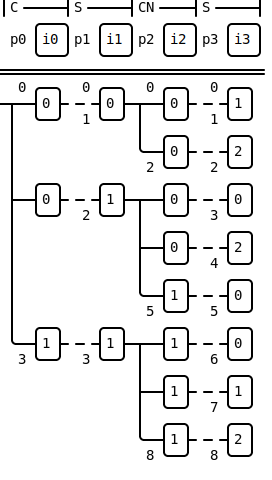

# `C-S-S-C`

```
taco_structure = [compressed, singleton, singleton, compressed]

structure      = [sparse, sparse, doubly_compressed, sparse]

```

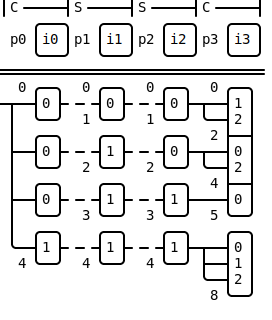

# `C-S-D-C`

```
taco_structure = [compressed, singleton, dense, compressed]

structure      = [sparse, doubly_compressed, compressed, sparse]

```

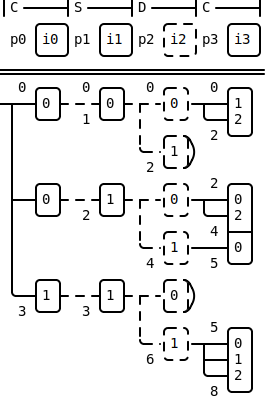

# `C-D-C-C`

```
taco_structure = [compressed, dense, compressed, compressed]

structure      = [doubly_compressed, compressed, doubly_compressed, sparse]

```

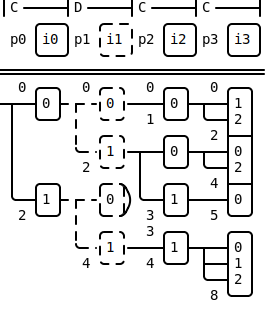

# `C-D-CN-S`

```
taco_structure = [compressed, dense, compressed-nonunique, singleton]

structure      = [doubly_compressed, compressed, sparse, sparse]

```

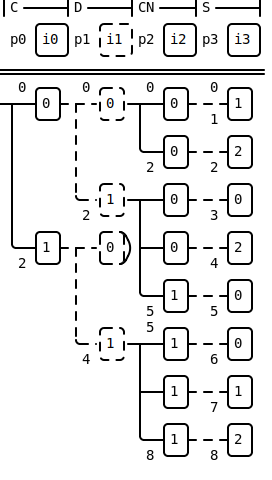

# `C-D-D-C`

```
taco_structure = [compressed, dense, dense, compressed]

structure      = [doubly_compressed, compressed, compressed, sparse]

```

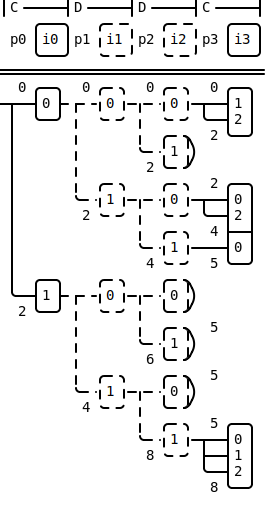

# `CN-S-S-S`

```
taco_structure = [compressed-nonunique, singleton, singleton, singleton]

structure      = [sparse, sparse, sparse, sparse]

```

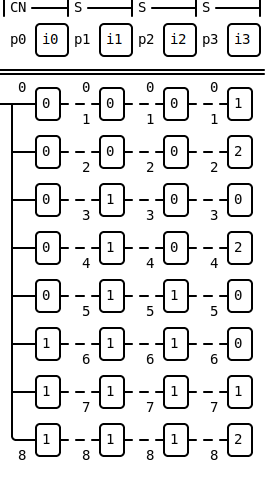

# `CN-S-D-C`

```
taco_structure = [compressed-nonunique, singleton, dense, compressed]

structure      = [sparse, sparse, compressed, sparse]

```

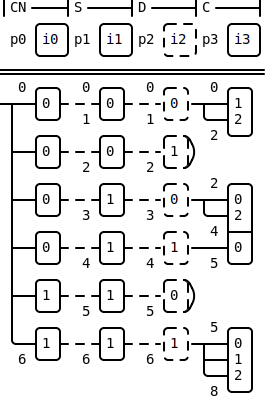

# `CN-D-C-C`

```
taco_structure = [compressed-nonunique, dense, compressed, compressed]

structure      = [sparse, compressed, doubly_compressed, sparse]

```

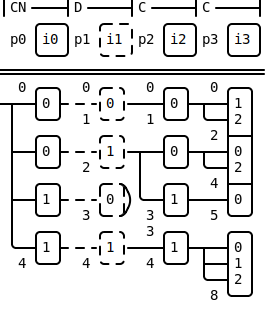

# `CN-D-CN-S`

```
taco_structure = [compressed-nonunique, dense, compressed-nonunique, singleton]

structure      = [sparse, compressed, sparse, sparse]

```

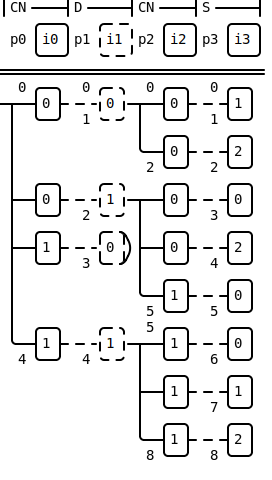

# `CN-D-D-C`

```
taco_structure = [compressed-nonunique, dense, dense, compressed]

structure      = [sparse, compressed, compressed, sparse]

```

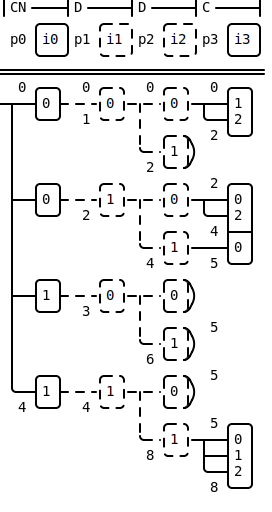

# `D-C-C-C`

```
taco_structure = [dense, compressed, compressed, compressed]

structure      = [compressed, doubly_compressed, doubly_compressed, sparse]

```

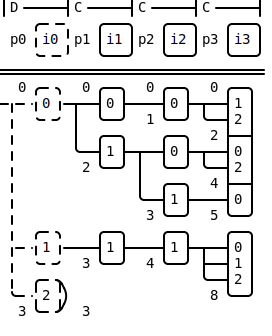

# `D-C-CN-S`

```
taco_structure = [dense, compressed, compressed-nonunique, singleton]

structure      = [compressed, doubly_compressed, sparse, sparse]

```

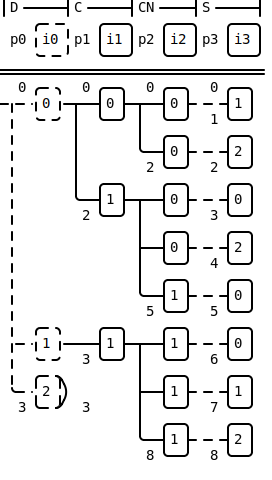

# `D-C-S-C`

```
taco_structure = [dense, compressed, singleton, compressed]

structure      = [compressed, sparse, doubly_compressed, sparse]

```

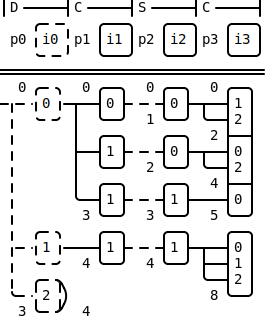

# `D-C-D-C`

```
taco_structure = [dense, compressed, dense, compressed]

structure      = [compressed, doubly_compressed, compressed, sparse]

```

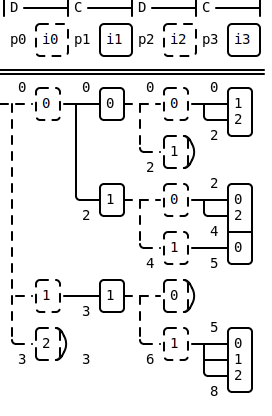

# `D-CN-S-S`

```
taco_structure = [dense, compressed-nonunique, singleton, singleton]

structure      = [compressed, sparse, sparse, sparse]

```

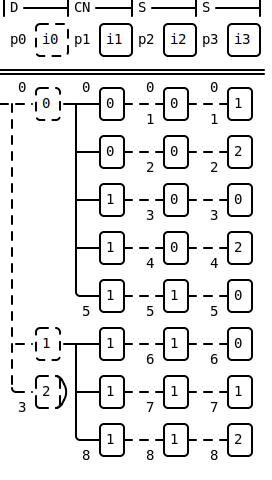

# `D-CN-D-C`

```
taco_structure = [dense, compressed-nonunique, dense, compressed]

structure      = [compressed, sparse, compressed, sparse]

```

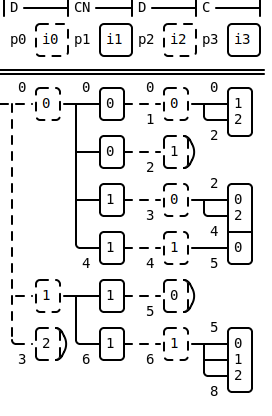

# `D-D-C-C`

```
taco_structure = [dense, dense, compressed, compressed]

structure      = [compressed, compressed, doubly_compressed, sparse]

```

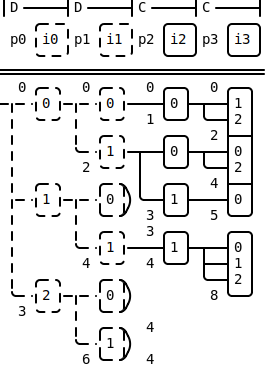

# `D-D-CN-S`

```
taco_structure = [dense, dense, compressed-nonunique, singleton]

structure      = [compressed, compressed, sparse, sparse]

```

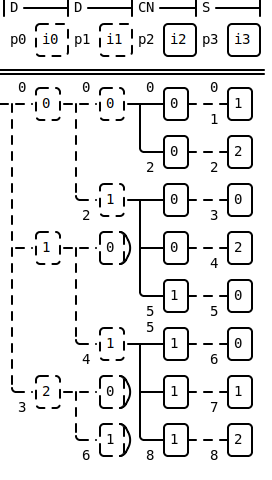

# `D-D-D-C`

```
taco_structure = [dense, dense, dense, compressed]

structure      = [compressed, compressed, compressed, sparse]

```

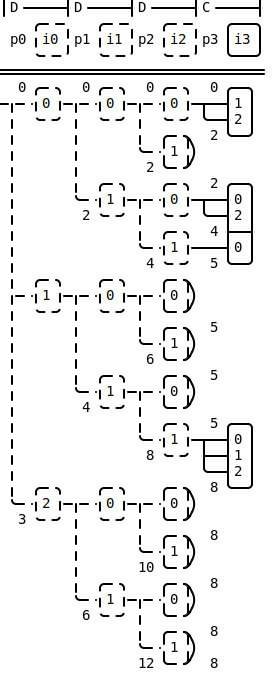

In [8]:
sparsities = ["compressed", "compressed-nonunique", "singleton", "dense"]
for structure in itertools.product(*([sparsities] * 4)):
    try:
        st = SparseTensor.from_taco(indices, shape=(3, 2, 2, 3), structure=structure)
    except Exception:
        continue
    taco = st.taco_view
    IPython.display.display(IPython.display.Markdown(f"# `{taco.abbreviation}`"))
    display_header(st)
    IPython.display.display(taco)

# voilà!
<hr>

## ✨ _Bonus: brain teasers_ ✨

#### Are any of these valid TACO (or MLIR sparse tensor) formats, and, if so, what do they mean?
```
- [compressed, compressed, compressed-nonunique, compressed]
- [compressed, compressed-nonunique, compressed, compressed]
- [compressed, compressed-nonunique, compressed-nonunique, compressed]
- [compressed, compressed-nonunique, compressed-nonunique, singleton]
- [compressed, compressed-nonunique, singleton, compressed]
- [compressed, dense, compressed-nonunique, compressed]
- [compressed, singleton, compressed-nonunique, compressed]
- [compressed-nonunique, compressed, compressed, compressed]
- [compressed-nonunique, compressed, compressed-nonunique, compressed]
- [compressed-nonunique, compressed, compressed-nonunique, singleton]
- [compressed-nonunique, compressed, dense, compressed]
- [compressed-nonunique, compressed, singleton, compressed]
- [compressed-nonunique, compressed-nonunique, compressed, compressed]
- [compressed-nonunique, compressed-nonunique, compressed-nonunique, compressed]
- [compressed-nonunique, compressed-nonunique, compressed-nonunique, singleton]
- [compressed-nonunique, compressed-nonunique, dense, compressed]
- [compressed-nonunique, compressed-nonunique, singleton, compressed]
- [compressed-nonunique, compressed-nonunique, singleton, singleton]
- [compressed-nonunique, dense, compressed-nonunique, compressed]
- [compressed-nonunique, singleton, compressed, compressed]
- [compressed-nonunique, singleton, compressed-nonunique, compressed]
- [compressed-nonunique, singleton, compressed-nonunique, singleton]
- [compressed-nonunique, singleton, singleton, compressed]
- [dense, compressed, compressed-nonunique, compressed]
- [dense, compressed-nonunique, compressed, compressed]
- [dense, compressed-nonunique, compressed-nonunique, compressed]
- [dense, compressed-nonunique, compressed-nonunique, singleton]
- [dense, compressed-nonunique, singleton, compressed]
- [dense, dense, compressed-nonunique, compressed]
```

#### What about these?
```
- [compressed, compressed, compressed, compressed-nonunique]
- [compressed, compressed, compressed-nonunique, compressed-nonunique]
- [compressed, compressed, dense, compressed-nonunique]
- [compressed, compressed, singleton, compressed-nonunique]
- [compressed, compressed-nonunique, compressed, compressed-nonunique]
- [compressed, compressed-nonunique, compressed-nonunique, compressed-nonunique]
- [compressed, compressed-nonunique, dense, compressed-nonunique]
- [compressed, compressed-nonunique, singleton, compressed-nonunique]
- [compressed, dense, compressed, compressed-nonunique]
- [compressed, dense, compressed-nonunique, compressed-nonunique]
- [compressed, dense, dense, compressed-nonunique]
- [compressed, dense, singleton, compressed-nonunique]
- [compressed, singleton, compressed, compressed-nonunique]
- [compressed, singleton, compressed-nonunique, compressed-nonunique]
- [compressed, singleton, dense, compressed-nonunique]
- [compressed, singleton, singleton, compressed-nonunique]
- [compressed-nonunique, compressed, compressed, compressed-nonunique]
- [compressed-nonunique, compressed, compressed-nonunique, compressed-nonunique]
- [compressed-nonunique, compressed, dense, compressed-nonunique]
- [compressed-nonunique, compressed, singleton, compressed-nonunique]
- [compressed-nonunique, compressed-nonunique, compressed, compressed-nonunique]
- [compressed-nonunique, compressed-nonunique, compressed-nonunique, compressed-nonunique]
- [compressed-nonunique, compressed-nonunique, dense, compressed-nonunique]
- [compressed-nonunique, compressed-nonunique, singleton, compressed-nonunique]
- [compressed-nonunique, dense, compressed, compressed-nonunique]
- [compressed-nonunique, dense, compressed-nonunique, compressed-nonunique]
- [compressed-nonunique, dense, dense, compressed-nonunique]
- [compressed-nonunique, dense, singleton, compressed-nonunique]
- [compressed-nonunique, singleton, compressed, compressed-nonunique]
- [compressed-nonunique, singleton, compressed-nonunique, compressed-nonunique]
- [compressed-nonunique, singleton, dense, compressed-nonunique]
- [compressed-nonunique, singleton, singleton, compressed-nonunique]
- [dense, compressed, compressed, compressed-nonunique]
- [dense, compressed, compressed-nonunique, compressed-nonunique]
- [dense, compressed, dense, compressed-nonunique]
- [dense, compressed, singleton, compressed-nonunique]
- [dense, compressed-nonunique, compressed, compressed-nonunique]
- [dense, compressed-nonunique, compressed-nonunique, compressed-nonunique]
- [dense, compressed-nonunique, dense, compressed-nonunique]
- [dense, compressed-nonunique, singleton, compressed-nonunique]
- [dense, dense, compressed, compressed-nonunique]
- [dense, dense, compressed-nonunique, compressed-nonunique]
- [dense, dense, dense, compressed-nonunique]
- [dense, dense, singleton, compressed-nonunique]
- [dense, singleton, compressed, compressed-nonunique]
- [dense, singleton, compressed-nonunique, compressed-nonunique]
- [dense, singleton, dense, compressed-nonunique]
- [dense, singleton, singleton, compressed-nonunique]
```

#### Or these?
```
- [singleton, compressed, compressed, compressed]
- [singleton, compressed, compressed, compressed-nonunique]
- [singleton, compressed, compressed, singleton]
- [singleton, compressed, compressed-nonunique, compressed]
- [singleton, compressed, compressed-nonunique, compressed-nonunique]
- [singleton, compressed, compressed-nonunique, singleton]
- [singleton, compressed, dense, compressed]
- [singleton, compressed, dense, compressed-nonunique]
- [singleton, compressed, dense, singleton]
- [singleton, compressed, singleton, compressed]
- [singleton, compressed, singleton, compressed-nonunique]
- [singleton, compressed, singleton, singleton]
- [singleton, compressed-nonunique, compressed, compressed]
- [singleton, compressed-nonunique, compressed, compressed-nonunique]
- [singleton, compressed-nonunique, compressed, singleton]
- [singleton, compressed-nonunique, compressed-nonunique, compressed]
- [singleton, compressed-nonunique, compressed-nonunique, compressed-nonunique]
- [singleton, compressed-nonunique, compressed-nonunique, singleton]
- [singleton, compressed-nonunique, dense, compressed]
- [singleton, compressed-nonunique, dense, compressed-nonunique]
- [singleton, compressed-nonunique, dense, singleton]
- [singleton, compressed-nonunique, singleton, compressed]
- [singleton, compressed-nonunique, singleton, compressed-nonunique]
- [singleton, compressed-nonunique, singleton, singleton]
- [singleton, dense, compressed, compressed]
- [singleton, dense, compressed, compressed-nonunique]
- [singleton, dense, compressed, singleton]
- [singleton, dense, compressed-nonunique, compressed]
- [singleton, dense, compressed-nonunique, compressed-nonunique]
- [singleton, dense, compressed-nonunique, singleton]
- [singleton, dense, dense, compressed]
- [singleton, dense, dense, compressed-nonunique]
- [singleton, dense, dense, singleton]
- [singleton, dense, singleton, compressed]
- [singleton, dense, singleton, compressed-nonunique]
- [singleton, dense, singleton, singleton]
- [singleton, singleton, compressed, compressed]
- [singleton, singleton, compressed, compressed-nonunique]
- [singleton, singleton, compressed, singleton]
- [singleton, singleton, compressed-nonunique, compressed]
- [singleton, singleton, compressed-nonunique, compressed-nonunique]
- [singleton, singleton, compressed-nonunique, singleton]
- [singleton, singleton, dense, compressed]
- [singleton, singleton, dense, compressed-nonunique]
- [singleton, singleton, dense, singleton]
- [singleton, singleton, singleton, compressed]
- [singleton, singleton, singleton, compressed-nonunique]
- [singleton, singleton, singleton, singleton]
```

#### Or, finally, these?
```
- [compressed, compressed, compressed, singleton]
- [compressed, compressed, dense, singleton]
- [compressed, compressed, singleton, singleton]
- [compressed, compressed-nonunique, compressed, singleton]
- [compressed, compressed-nonunique, dense, singleton]
- [compressed, dense, compressed, singleton]
- [compressed, dense, dense, singleton]
- [compressed, dense, singleton, compressed]
- [compressed, dense, singleton, singleton]
- [compressed, singleton, compressed, singleton]
- [compressed, singleton, dense, singleton]
- [compressed, singleton, singleton, singleton]
- [compressed-nonunique, compressed, compressed, singleton]
- [compressed-nonunique, compressed, dense, singleton]
- [compressed-nonunique, compressed, singleton, singleton]
- [compressed-nonunique, compressed-nonunique, compressed, singleton]
- [compressed-nonunique, compressed-nonunique, dense, singleton]
- [compressed-nonunique, dense, compressed, singleton]
- [compressed-nonunique, dense, dense, singleton]
- [compressed-nonunique, dense, singleton, compressed]
- [compressed-nonunique, dense, singleton, singleton]
- [compressed-nonunique, singleton, compressed, singleton]
- [compressed-nonunique, singleton, dense, singleton]
- [dense, compressed, compressed, singleton]
- [dense, compressed, dense, singleton]
- [dense, compressed, singleton, singleton]
- [dense, compressed-nonunique, compressed, singleton]
- [dense, compressed-nonunique, dense, singleton]
- [dense, dense, compressed, singleton]
- [dense, dense, dense, singleton]
- [dense, dense, singleton, compressed]
- [dense, dense, singleton, singleton]
- [dense, singleton, compressed, compressed]
- [dense, singleton, compressed, singleton]
- [dense, singleton, compressed-nonunique, compressed]
- [dense, singleton, compressed-nonunique, singleton]
- [dense, singleton, dense, compressed]
- [dense, singleton, dense, singleton]
- [dense, singleton, singleton, compressed]
- [dense, singleton, singleton, singleton]
```